# Diabetes Detection using XGBOOST and RandomForest Classifer

In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Importing Data set
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Lets check the outcome (Independent varible) count
True_count = diabetes[diabetes['Outcome']==1]
False_count = diabetes[diabetes['Outcome']==0]
print("True : ",True_count.shape)
print("False : ",False_count.shape)

True :  (268, 9)
False :  (500, 9)


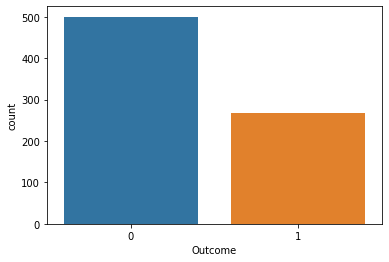

In [4]:
#Visualize
sns.countplot(data=diabetes,x='Outcome')

In [5]:
#Lets check if there is any NAN values
diabetes.isnull().sum().any

<bound method Series.any of Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64>

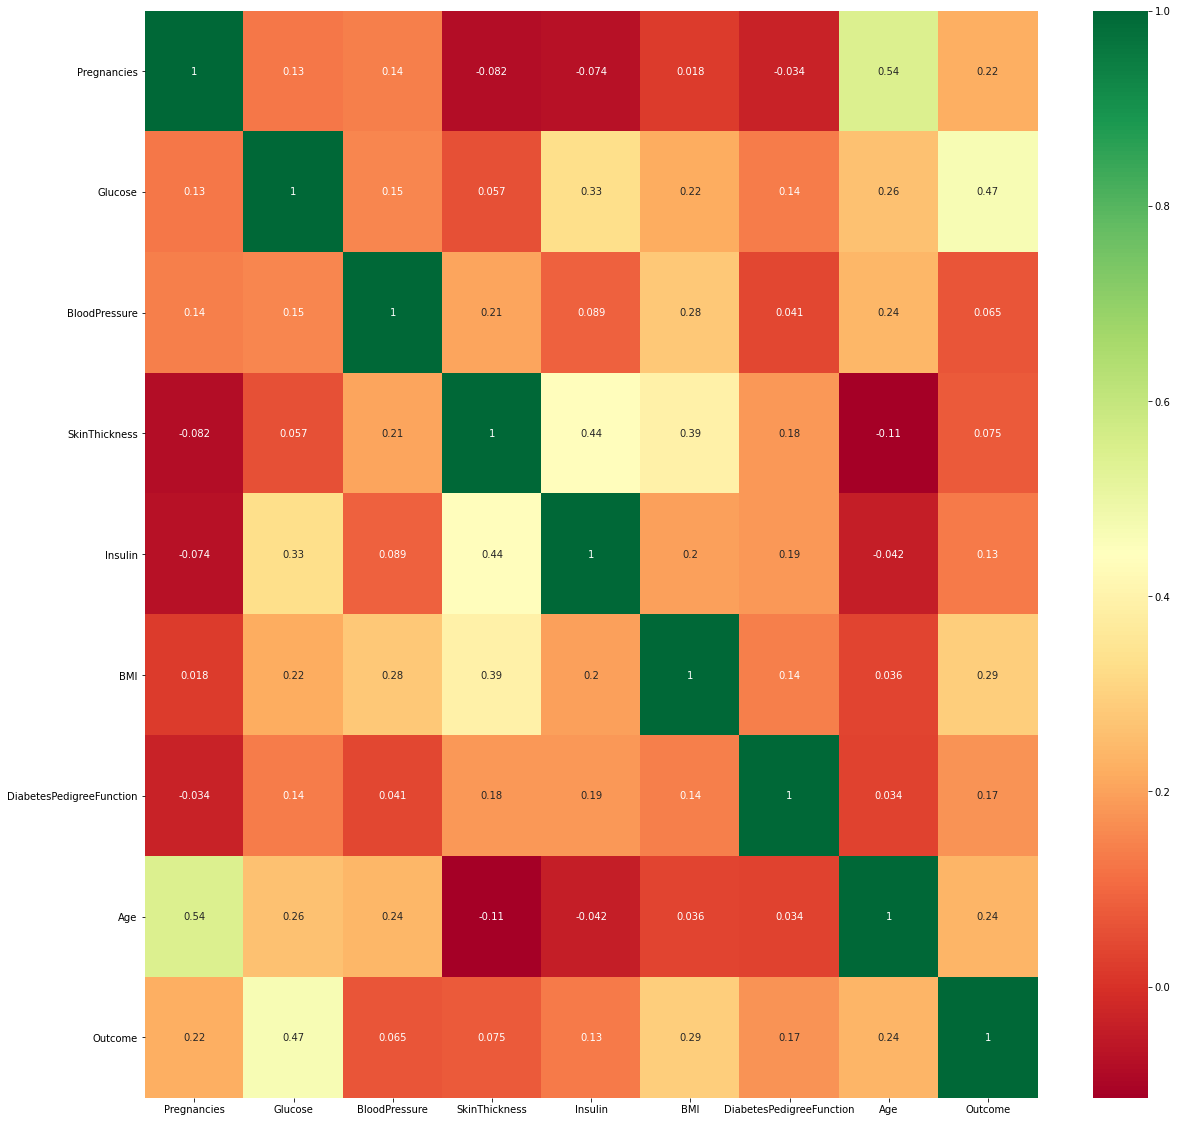

In [6]:
#Correlation
corrmat = diabetes.corr()
top_corr_mat = corrmat.index
plt.figure(figsize=(20,20))

g = sns.heatmap(diabetes[top_corr_mat].corr(),annot=True,cmap="RdYlGn")

In [7]:
#Convert 1 and 0 to True and False for reference
diabetes['Outcome_Backup'] = diabetes['Outcome'].map({1:True,0:False})

In [8]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_Backup
0,6,148,72,35,0,33.6,0.627,50,1,True
1,1,85,66,29,0,26.6,0.351,31,0,False
2,8,183,64,0,0,23.3,0.672,32,1,True
3,1,89,66,23,94,28.1,0.167,21,0,False
4,0,137,40,35,168,43.1,2.288,33,1,True


In [9]:
#We notice there are many zero values in columns, hence we can fill mean values for those rows.

independent_feature = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
dependent_feature = ['Outcome']


print("Total rows : {}".format(len(diabetes)))
print('----------------')

for i in (independent_feature):
    print("No of missing rows in "+str(i)+" : {}".format(len(diabetes.loc[diabetes[i]==0])))

Total rows : 768
----------------
No of missing rows in Pregnancies : 111
No of missing rows in Glucose : 5
No of missing rows in BloodPressure : 35
No of missing rows in SkinThickness : 227
No of missing rows in Insulin : 374
No of missing rows in BMI : 11
No of missing rows in DiabetesPedigreeFunction : 0
No of missing rows in Age : 0


Here we can use REPLACE method to replace ZERO value to Mean. But I want to use another metho IMPUTER after test train split.

In [10]:
# #Using REPLACE method to fill the values with Mean
# for i in (independent_feature):
#     diabetes[i] = diabetes[i].replace(0,diabetes[i].mean())

In [11]:
# #Check again
# print("Total rows : {}".format(len(diabetes)))
# print('----------------')

# for i in (independent_feature):
#     print("No of missing rows in "+str(i)+" : {}".format(len(diabetes.loc[diabetes[i]==0])))

In [12]:
#Lets store dependent and indepedent features in X and y
X = diabetes[independent_feature]
y = diabetes[dependent_feature]

In [13]:
#Alternatively we can use the following as well for X and y
X = diabetes.drop(['Outcome','Outcome_Backup'],axis=1)
y = diabetes['Outcome']

In [14]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [15]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [16]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [17]:
#Since there are zero values , we will fill mean value instead of zero using Imputer
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0,strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

## Model Building with 2 Machine Learning Model

## RandomForest Classifier 

In [18]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier()

In [19]:
#Fitting the model
random_forest_classifier.fit(X_train,y_train.ravel()) #Without ravel it is giving us the warning

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
#Prediction
predict_randomForest = random_forest_classifier.predict(X_test)
predict_randomForest

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
#Evaluation of our model
from sklearn.metrics import accuracy_score,confusion_matrix
Random_Forest_Accuracy =accuracy_score(y_test,predict_randomForest)
Random_Forest_Accuracy = round(Random_Forest_Accuracy,2)*100
print("Confusion Matrix : \n",confusion_matrix(y_test,predict_randomForest))
print("Accuracy Score : {0:.3f}".format(accuracy_score(y_test,predict_randomForest)))

Confusion Matrix : 
 [[128  16]
 [ 45  42]]
Accuracy Score : 0.736


We have the accuracy of 72% from Random Forest Classifer.

# XGBoost Classifier 

In [22]:
import xgboost
classifier = xgboost.XGBClassifier()

In [23]:
#Fitting the model
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [24]:
#Predicting 
predict_XGBOOST = classifier.predict(X_test)

In [25]:
#Evaluation of our model
from sklearn.metrics import accuracy_score,confusion_matrix
XGBOOST_without_RandomizedSeachCV = accuracy_score(y_test,predict_XGBOOST)
XGBOOST_without_RandomizedSeachCV = round(XGBOOST_without_RandomizedSeachCV,2)*100
print("Confusion Matrix : \n",confusion_matrix(y_test,predict_XGBOOST))
print("Accuracy Score : {0:.3f}".format(accuracy_score(y_test,predict_XGBOOST)))

Confusion Matrix : 
 [[124  20]
 [ 38  49]]
Accuracy Score : 0.749


We have the accuracy of 74% from XGBOOST classifier.

Lets apply hyper parameters tuning using RandomizedSearchCV

In [26]:
from sklearn.model_selection import RandomizedSearchCV
classifier_Randomized = xgboost.XGBClassifier()

In [27]:
#Hyper parameters

params = {
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,7,8,10,12,15],
    "min_child_weight" : [1,3,5,7],
    "gamma" : [0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree" : [0.3,0.4,0.5,0.7]
}

In [28]:
random_search = RandomizedSearchCV(
                                    classifier_Randomized,
                                    param_distributions=params,
                                    n_iter=5,
                                    scoring='roc_auc',
                                    n_jobs=-1,
                                    cv=5,
                                    verbose=3
)

In [29]:
random_search

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distribu

In [30]:
random_search.fit(X_train,y_train.ravel())

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.5s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distribu

In [31]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [32]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 8,
 'learning_rate': 0.05,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [33]:
classifier_Randomized = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [34]:
classifier_Randomized

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [35]:
classifier_Randomized.fit(X_train,y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [36]:
#Prediction
classifier_Randomized_pred = classifier_Randomized.predict(X_test)

In [37]:
classifier_Randomized_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [38]:
#Evaluation of our model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
XGBOOST_with_RandomizedSeachCV = accuracy_score(y_test,classifier_Randomized_pred)
XGBOOST_with_RandomizedSeachCV = round(XGBOOST_with_RandomizedSeachCV,2)*100
print("Confusion Matrix : \n",confusion_matrix(y_test,classifier_Randomized_pred))
print("Accuracy Score : {0:.3f}".format(accuracy_score(y_test,classifier_Randomized_pred)))
print("------ \n")
print("Classification Reports : ",classification_report(y_test,classifier_Randomized_pred))

Confusion Matrix : 
 [[123  21]
 [ 37  50]]
Accuracy Score : 0.749
------ 

Classification Reports :                precision    recall  f1-score   support

           0       0.77      0.85      0.81       144
           1       0.70      0.57      0.63        87

    accuracy                           0.75       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.74      0.75      0.74       231



In [39]:
#Comparison of models

In [58]:
comparison = pd.DataFrame({
    'Model' : ['Random_Forest_Accuracy',
                'XGBOOST_with_RandomizedSeachCV',
                'XGBOOST_without_RandomizedSeachCV'],
    'Accuracy' : [Random_Forest_Accuracy,
                  XGBOOST_with_RandomizedSeachCV,
                  XGBOOST_without_RandomizedSeachCV
                 ]
}
)
comparison.head()

,Model,Accuracy
0,Random_Forest_Accuracy,74.0
1,XGBOOST_with_RandomizedSeachCV,75.0
2,XGBOOST_without_RandomizedSeachCV,75.0


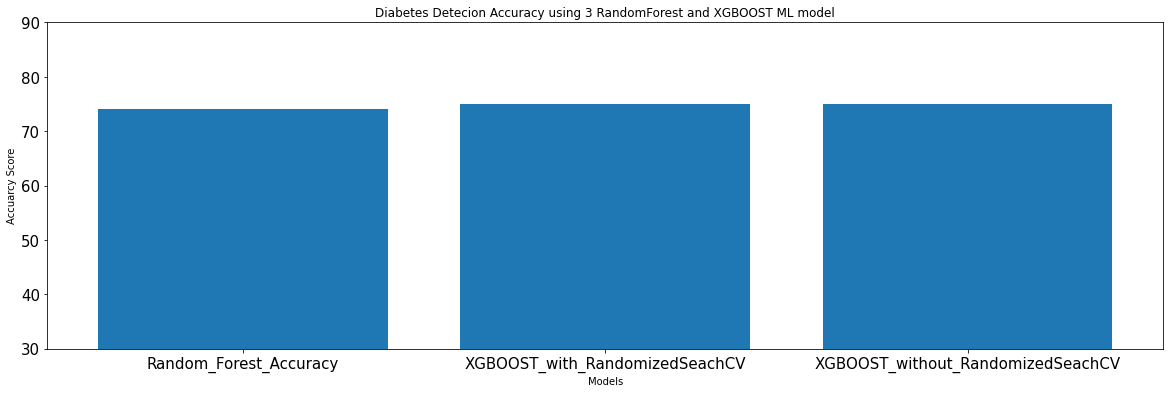

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.bar(comparison['Model'],comparison['Accuracy'])

plt.ylim(30,90)
plt.tick_params(labelsize=15)
plt.title('Diabetes Detecion Accuracy using 3 RandomForest and XGBOOST ML model')
plt.xlabel('Models')
plt.ylabel('Accuarcy Score')
plt.show()